<a href="https://colab.research.google.com/github/muhammadhafiz27/Representasi-Teks-dan-Word-Embedding/blob/main/Representasi_Teks_dan_Word_Embedding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import dan Preprocessing Data**

In [1]:
!pip install Sastrawi

In [2]:
!pip install gensim

In [7]:
!python -m spacy download en_core_web_lg

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.7/400.7 MB 4.2 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [3]:
import pandas as pd
import re
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from nltk.corpus import stopwords
import nltk

# Download necessary NLTK data
nltk.download('stopwords')

# Load the dataset
url = "https://raw.githubusercontent.com/muhammadhafiz27/Representasi-Teks-dan-Word-Embedding/refs/heads/main/tweet_pendidikan.csv"
df = pd.read_csv(url)

# Keep only 50 tweets
df = df.head(50)

# Function for text preprocessing
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove punctuation, numbers, and URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    text = re.sub(r'\d+', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    # Remove Indonesian stopwords
    stop_words = set(stopwords.words('indonesian'))
    text = ' '.join(word for word in text.split() if word not in stop_words)
    # Stemming with Sastrawi
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()
    text = stemmer.stem(text)
    return text

# Apply preprocessing to the 'full_text' column
df['processed_tweet'] = df['full_text'].apply(preprocess_text)

# Display the original and processed tweets
display(df[['full_text', 'processed_tweet']].head())

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,full_text,processed_tweet
0,@UnitBerita Sahroni : masih bisa senyum? Tentu...,unitberita sahroni senyum harap sedih malu lia...
1,Masuk polisi itu ada test psikologi gaa sih? A...,masuk polisi test psikologi gaa sih didik bena...
2,@Na_risa13 @tanyarlfes Padahal pekerjaaan pend...,na risa tanyarlfes pekerjaaan didik sehat peng...
3,@Hikari_Tamagoyo @EdogawaHikari Kl Muhammadiya...,hikari tamagoyo edogawahikari kl muhammadiyah ...
4,@iniaashaakkk tugas apa nih aayy? kebetulan ak...,iniaashaakkk tugas nih aayy bbrp tim dgn backg...


# **Representasi Teks dengan BoW dan TF-IDF**

In [6]:
from sklearn.feature_extraction.text import CountVectorizer

# Implement Bag of Words
vectorizer = CountVectorizer()
bow_matrix = vectorizer.fit_transform(df['processed_tweet'])

# Display the BoW matrix
print("Bag of Words Matrix:")
print(bow_matrix.toarray())

# Display the feature names (words)
print("\nFeature Names (Words):")
print(vectorizer.get_feature_names_out())

Bag of Words Matrix:
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]

Feature Names (Words):
['aayy' 'abis' 'adab' 'adil' 'adityanstr' 'adl' 'agam' 'agama' 'ah' 'ai'
 'aja' 'ajar' 'akabri' 'akibat' 'akses' 'aku' 'akubucindonat' 'akuu'
 'alokasi' 'amanah' 'amp' 'ampkesehatan' 'anak' 'anakanak' 'anggar'
 'anggota' 'angklung' 'anjg' 'anjir' 'antekantek' 'apakabar' 'api' 'arti'
 'artikel' 'asa' 'asas' 'asbunkan' 'asing' 'asisten' 'awaninews'
 'awanipagi' 'ayah' 'ayao' 'baca' 'background' 'bagus' 'bahasa' 'baik'
 'bain' 'bal' 'banget' 'bangsa' 'bangun' 'bareng' 'batal' 'batik' 'bawah'
 'bayar' 'bbrp' 'bcs' 'beasiswa' 'begoooo' 'beliau' 'benar' 'beneran'
 'bentuk' 'ber' 'berangkat' 'bgt' 'bidang' 'bijak' 'bikin' 'bina' 'bjil'
 'blm' 'blum' 'bodoh' 'bodohbodoh' 'bom' 'boro' 'bos' 'brfelindra' 'buang'
 'budaya' 'bukti' 'buta' 'butuh' 'byk' 'canang' 'canting' 'cantingcap'
 'cap' 'capai' 'capek' 'cari' 'cepat' 'cerai' 'chico

In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Implement TF-IDF
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(df['processed_tweet'])

# Display the TF-IDF matrix
print("TF-IDF Matrix:")
print(tfidf_matrix.toarray())

# Display the feature names (words)
print("\nFeature Names (Words):")
print(tfidf_vectorizer.get_feature_names_out())

TF-IDF Matrix:
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]

Feature Names (Words):
['aayy' 'abis' 'adab' 'adil' 'adityanstr' 'adl' 'agam' 'agama' 'ah' 'ai'
 'aja' 'ajar' 'akabri' 'akibat' 'akses' 'aku' 'akubucindonat' 'akuu'
 'alokasi' 'amanah' 'amp' 'ampkesehatan' 'anak' 'anakanak' 'anggar'
 'anggota' 'angklung' 'anjg' 'anjir' 'antekantek' 'apakabar' 'api' 'arti'
 'artikel' 'asa' 'asas' 'asbunkan' 'asing' 'asisten' 'awaninews'
 'awanipagi' 'ayah' 'ayao' 'baca' 'background' 'bagus' 'bahasa' 'baik'
 'bain' 'bal' 'banget' 'bangsa' 'bangun' 'bareng' 'batal' 'batik' 'bawah'
 'bayar' 'bbrp' 'bcs' 'beasiswa' 'begoooo' 'beliau' 'benar' 'beneran'
 'bentuk' 'ber' 'berangkat' 'bgt' 'bidang' 'bijak' 'bikin' 'bina' 'bjil'
 'blm' 'blum' 'bodoh' 'bodohbodoh' 'bom' 'boro' 'bos' 'brfelindra' 'buang'
 'budaya' 'bukti' 'buta' 'butuh' 'byk' 'canang' 'canting' 'cantingcap'
 'cap' 'capai' 'capek'

# **Implementasi Word Embedding**

In [4]:
from gensim.models import Word2Vec
import numpy as np

# Tokenize the processed tweets for Word2Vec
tokenized_tweets = [tweet.split() for tweet in df['processed_tweet']]

# Train a Word2Vec model
# You can adjust the parameters (e.g., vector_size, window, min_count, workers)
model = Word2Vec(sentences=tokenized_tweets, vector_size=100, window=5, min_count=1, workers=4)

# Function to get the vector representation of a tweet (average of word vectors)
def get_tweet_vector(tweet_tokens, model):
    vectors = [model.wv[word] for word in tweet_tokens if word in model.wv]
    if vectors:
        return np.mean(vectors, axis=0)
    else:
        return np.zeros(model.wv.vector_size) # Return a zero vector for empty tweets

# Get vectors for each processed tweet
df['word2vec_vector'] = df['processed_tweet'].apply(lambda x: get_tweet_vector(x.split(), model))

# Display the Word2Vec vectors for the first few tweets
print("Word2Vec Vectors:")
display(df['word2vec_vector'].head())

Word2Vec Vectors:


,word2vec_vector
0,"[0.00095324515, 4.1473348e-05, -0.0014728653, ..."
1,"[-0.00044966317, 0.0005970282, 0.0015444526, 0..."
2,"[0.0012445571, -0.00313004, 0.001400931, -0.00..."
3,"[0.00077250635, 0.001461039, 0.00024213122, 0...."
4,"[0.00083417597, 0.0024229423, 0.00057291193, -..."


In [8]:
import spacy
import numpy as np

# Load the large English GloVe model
# You might need to adjust the model name depending on the available models in spaCy
try:
    nlp = spacy.load("en_core_web_lg")
except OSError:
    print("Downloading en_core_web_lg model. Please run the cell again after the download is complete.")
    print("python -m spacy download en_core_web_lg")
    exit()


# Function to get the GloVe vector representation of a tweet
def get_glove_tweet_vector(text, nlp_model):
    # Process the text with spaCy
    doc = nlp_model(text)
    # Get the vectors for each token and average them
    vectors = [token.vector for token in doc if token.has_vector]
    if vectors:
        return np.mean(vectors, axis=0)
    else:
        return np.zeros(nlp_model.vocab.vectors.shape[1]) # Return a zero vector if no tokens have vectors

# Get GloVe vectors for each processed tweet
df['glove_vector'] = df['processed_tweet'].apply(lambda x: get_glove_tweet_vector(x, nlp))

# Display the GloVe vectors for the first few tweets
print("\nGloVe Vectors:")
display(df['glove_vector'].head())


GloVe Vectors:


,glove_vector
0,"[0.14248501, -0.14479034, 0.32503882, 0.208208..."
1,"[0.17612876, 0.11856834, 0.18931106, 0.3517913..."
2,"[0.06278999, -0.34493, 0.06347481, 0.23071201,..."
3,"[0.12325486, -0.17426814, 0.4107184, 0.2322096..."
4,"[-0.0012167487, -0.16000536, 0.090707175, 0.06..."


# **Visualisasi Representasi Teks**

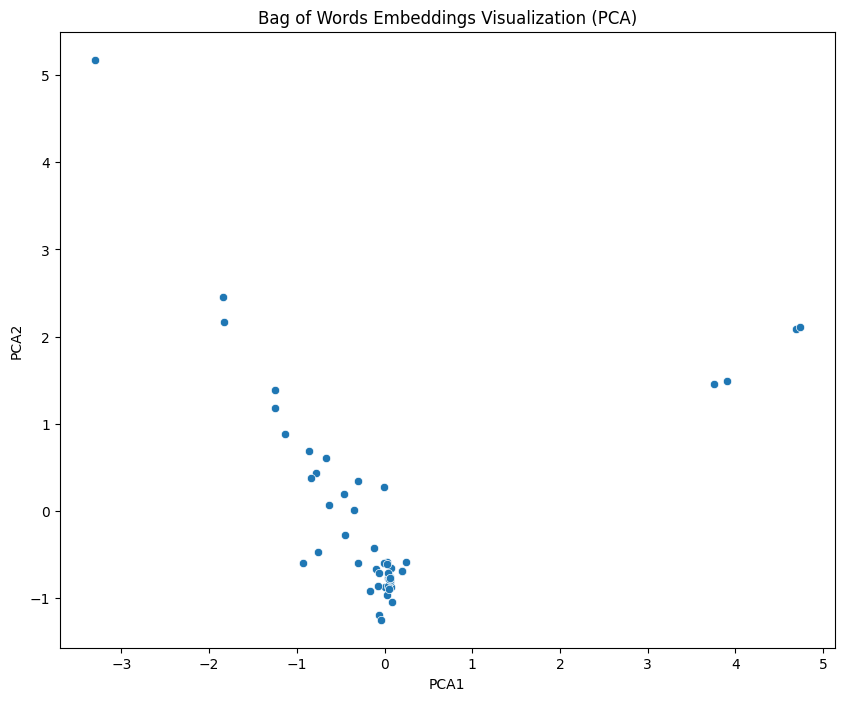

In [12]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Convert sparse BoW matrix to a dense numpy array for PCA
bow_vectors_2d = bow_matrix.toarray()

# Apply PCA to reduce dimension to 2
pca_bow = PCA(n_components=2)
bow_pca = pca_bow.fit_transform(bow_vectors_2d)

# Create a DataFrame for visualization
bow_pca_df = pd.DataFrame(bow_pca, columns=['PCA1', 'PCA2'])
bow_pca_df['tweet'] = df['processed_tweet'] # Add processed tweet for reference

# Visualize BoW PCA
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PCA1', y='PCA2', data=bow_pca_df)
plt.title('Bag of Words Embeddings Visualization (PCA)')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.show()

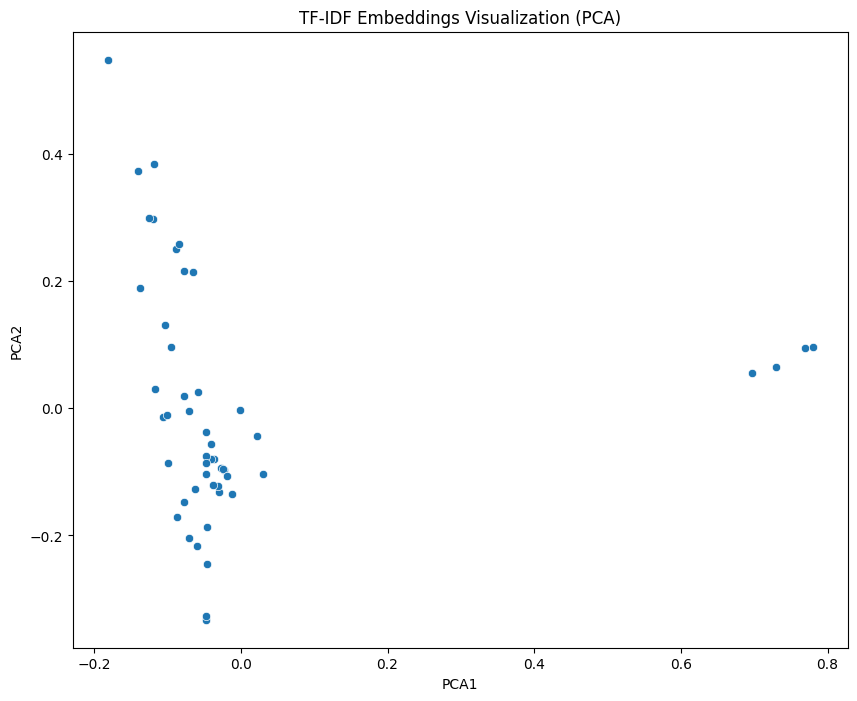

In [13]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Convert sparse TF-IDF matrix to a dense numpy array for PCA
tfidf_vectors_2d = tfidf_matrix.toarray()


# Apply PCA to reduce dimension to 2
pca_tfidf = PCA(n_components=2)
tfidf_pca = pca_tfidf.fit_transform(tfidf_vectors_2d)

# Create a DataFrame for visualization
tfidf_pca_df = pd.DataFrame(tfidf_pca, columns=['PCA1', 'PCA2'])
tfidf_pca_df['tweet'] = df['processed_tweet'] # Add processed tweet for reference

# Visualize TF-IDF PCA
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PCA1', y='PCA2', data=tfidf_pca_df)
plt.title('TF-IDF Embeddings Visualization (PCA)')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.show()

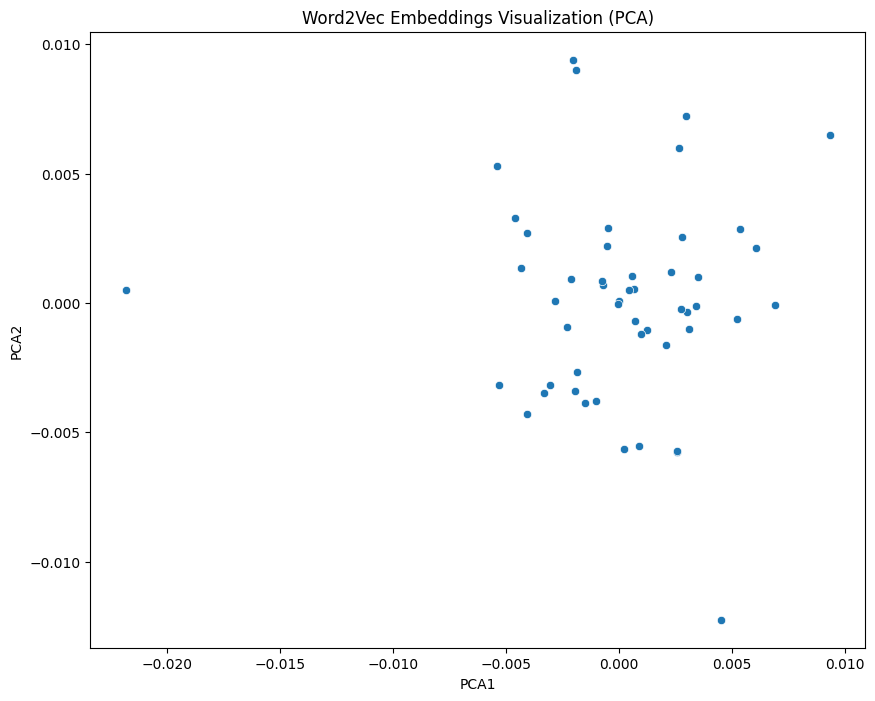

In [9]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Convert list of arrays to a 2D numpy array for PCA
word2vec_vectors_2d = np.vstack(df['word2vec_vector'].values)

# Apply PCA to reduce dimension to 2
pca = PCA(n_components=2)
word2vec_pca = pca.fit_transform(word2vec_vectors_2d)

# Create a DataFrame for visualization
word2vec_pca_df = pd.DataFrame(word2vec_pca, columns=['PCA1', 'PCA2'])
word2vec_pca_df['tweet'] = df['processed_tweet'] # Add processed tweet for reference

# Visualize Word2Vec PCA
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PCA1', y='PCA2', data=word2vec_pca_df)
plt.title('Word2Vec Embeddings Visualization (PCA)')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.show()

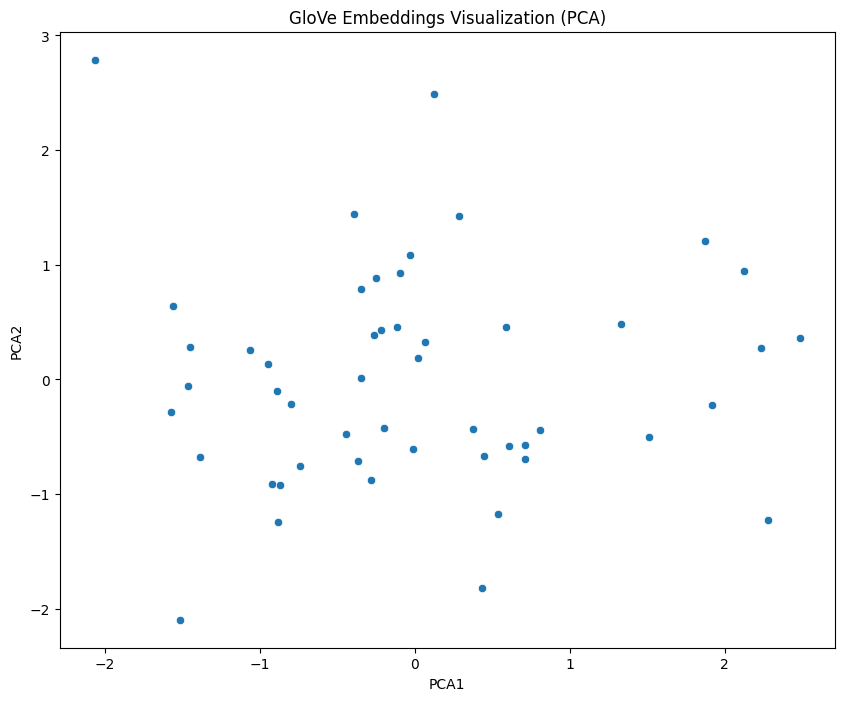

In [10]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Convert list of arrays to a 2D numpy array for PCA
glove_vectors_2d = np.vstack(df['glove_vector'].values)


# Apply PCA to reduce dimension to 2
pca = PCA(n_components=2)
glove_pca = pca.fit_transform(glove_vectors_2d)

# Create a DataFrame for visualization
glove_pca_df = pd.DataFrame(glove_pca, columns=['PCA1', 'PCA2'])
glove_pca_df['tweet'] = df['processed_tweet'] # Add processed tweet for reference

# Visualize GloVe PCA
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PCA1', y='PCA2', data=glove_pca_df)
plt.title('GloVe Embeddings Visualization (PCA)')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.show()